<div class="alert alert-block alert-success">

#### <span style=" color:red"> Laptop Prices Project
- Welcome to this exploratory data analysis (EDA) project on laptop prices. The dataset used in this study includes various characteristics such as brand, type, screen size,
hardware specifications, and price. Through data cleaning, visualization and basic statistical methods, the analysis aims to provide valuable insights into the most important 
variables that shape laptop prices.
- (I hope this notebook proves useful regarding the use of colors in graphics)
__________________________________________________________________________________________________________________________________________________________________________________________
- Laptop fiyatları üzerine gerçekleştireceğimiz bu keşifsel veri analizi (EDA- exploratory data analysis) projesine hoş geldiniz. Bu çalışmada kullanılan veri seti; marka, tip, 
ekran boyutu, donanım özellikleri ve fiyat gibi çeşitli özellikleri içermektedir. Analiz kapsamında veri temizleme, görselleştirme ve temel istatistiksel yöntemlerle, 
laptop fiyatlarını şekillendiren en önemli değişkenler hakkında değerli içgörüler elde edilmesi amaçlanmaktadır.
- (grafiklerde renklerin kullanımına ilişkin faydalı bir notebook olması dileklerimle)

In [1]:
# the first time you install libraries (kütüphaneleri ilk defa yüklediğinde)
# !pip install numpy
# !pip install pandas
# !pip install matplotlib   
# !pip install seaborn
# !pip install plotly
# !pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# to suppress unnecessary passive warnings (gereksiz pasif uyarıları bastırmak için)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
# to view all columns and rows (tüm sütunları ve satırları görüntülemek için)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# load dataset, create df (veri setini yükle, df oluştur)
df0 = pd.read_csv('laptop_data.csv') 
df = df0.copy()

In [5]:
# view first few lines (ilk birkaç satırı görüntüle)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
# general information about data set (veri seti hakkında genel bilgi)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# remove repeating index column (tekrar eden index sütunu kaldırıldı)
df.drop(columns=['Unnamed: 0'], inplace=True)  

In [8]:
# view column names (sütun isimlerini görüntüle)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [9]:
# capitalize only the first letter of column names (sütun adlarının sadece ilk harfini büyük yap)
df.columns = df.columns.str.capitalize()

In [10]:
# rename to standardize column names (sütun isimlerini standardize etmek için yeniden adlandır)
df.rename(columns={
    'Typename': 'Type',
    'Screenresolution': 'Resolution',
    'Ram': 'RamGB',
    'Weight': 'Kg',
    'Price' : 'PriceTL'}, inplace=True)

In [11]:
df.columns

Index(['Company', 'Type', 'Inches', 'Resolution', 'Cpu', 'RamGB', 'Memory',
       'Gpu', 'Opsys', 'Kg', 'PriceTL'],
      dtype='object')

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Data Cleaning (Veri temizleme)

In [12]:
# duplicate rows (tekrar eden satırlar)
df.duplicated().sum()

29

In [13]:
# Unique (excluding the first occurrence), clean, properly indexed from scratch
# Tekrarsız (ilk tekrar hariç), temiz, sıfırdan düzgün indeksli
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [14]:
# missing values (eksik değerler)
df.isnull().sum()  # there are no missing values here (burada eksik değer yok)

Company       0
Type          0
Inches        0
Resolution    0
Cpu           0
RamGB         0
Memory        0
Gpu           0
Opsys         0
Kg            0
PriceTL       0
dtype: int64

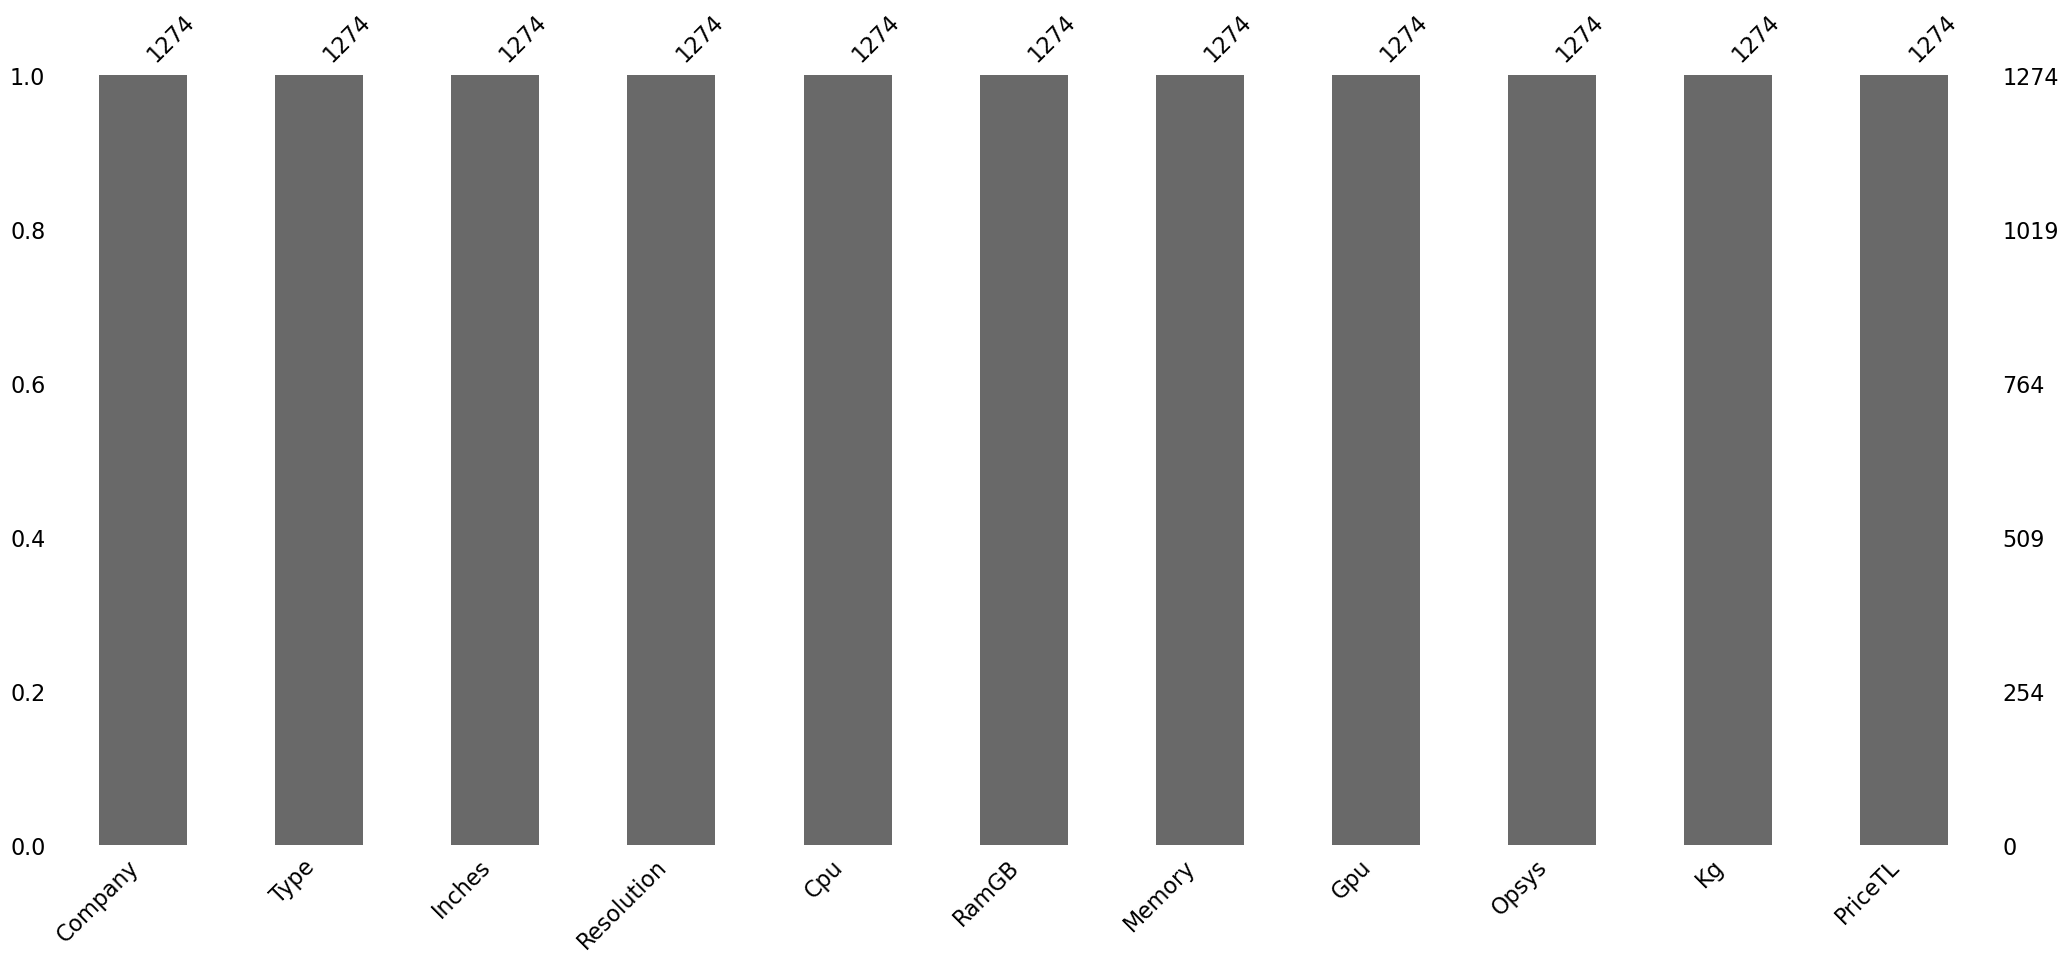

In [15]:
# graph of missing values (eksik değerler grafiği)
msno.bar(df);

In [16]:
# 10 random rows (rasgele 10 satır)
df.sample(10)

,Company,Type,Inches,Resolution,Cpu,RamGB,Memory,Gpu,Opsys,Kg,PriceTL
974,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,109218.6720
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg,153705.3408
640,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.5kg,59087.5200
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
821,Toshiba,Ultrabook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.25kg,58075.2000
824,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg,99900.0000
618,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.94kg,120831.5808
466,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.2kg,24988.3200
1145,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.0kg,101178.7200
774,HP,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg,66280.3200


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     1274 non-null   object 
 1   Type        1274 non-null   object 
 2   Inches      1274 non-null   float64
 3   Resolution  1274 non-null   object 
 4   Cpu         1274 non-null   object 
 5   RamGB       1274 non-null   object 
 6   Memory      1274 non-null   object 
 7   Gpu         1274 non-null   object 
 8   Opsys       1274 non-null   object 
 9   Kg          1274 non-null   object 
 10  PriceTL     1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 109.6+ KB


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Clean numerical columns (Sayısal sütunları temizleme)

In [18]:
# convert RamGB and Kg columns to numeric by removing GB/kg
# RamGB ve Kg sütunlarını sayısala çevir, GB/kg ifadelerini kaldır

In [19]:
df['RamGB'] = df['RamGB'].str.replace('GB', '').astype(int)
df['Kg'] = df['Kg'].str.replace('kg', '').astype(float)

In [20]:
# Round PriceTL column to 2 decimal places. (PriceTL sütununu 2 ondalık basamağa yuvarla)
df['PriceTL'] = df['PriceTL'].round(2)

In [21]:
df.describe().T  # istatistik hesaplamalar

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,15.022449,1.429940,10.10,14.000,15.60,15.60,18.40
RamGB,1274.0,8.444270,5.098291,2.00,4.000,8.00,8.00,64.00
Kg,1274.0,2.040400,0.669444,0.69,1.500,2.04,2.31,4.70
PriceTL,1274.0,60503.185071,37333.223017,9270.72,32495.605,52693.92,79773.48,324954.72


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Clean categorical columns (Kategorik sütunları temizleme)

- We will provide consistent formatting in the Company, Type and Opsys columns, grouping similar OS types in the Opsys column. 
___________________________________________
- Company, Type ve Opsys sütunlarında tutarlı biçimlendirme sağlayacağız, Opsys sütunundaki benzer işletim sistemi türlerini gruplayacağız.

In [22]:
# check the unique values (benzersiz değerleri kontrol)

In [23]:
print(df['Company'].unique()) 

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [24]:
print(df['Type'].unique())

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [25]:
print(df['Opsys'].unique())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [26]:
# Company and Type columns have no data to group. Group similar operating system types in the Opsys column
# Company ve Type sütunlarında gruplanacak veri yok. Opsys sütunundaki benzer işletim sistemi türlerini grupla

In [27]:
df['Opsys'] = df['Opsys'].str.lower().replace({
    'windows 10': 'Windows',
    'windows 10 s': 'Windows',
    'windows 7': 'Windows',
    'macos': 'Mac',
    'mac os x': 'Mac',
    'linux': 'Linux',
    'chrome os': 'Chrome os',
    'android': 'Android',
    'no os': 'No os'
})

In [28]:
print(df['Opsys'].value_counts())

Opsys
Windows      1100
No os          66
Linux          58
Chrome os      27
Mac            21
Android         2
Name: count, dtype: int64


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Split compound columns:
- We will parse the resolution (Full HD, 4K) information (Çözünürlük (ör. Full HD, 4K) bilgilerini ayrıştır)
- Touch screen (Yes/No) (Dokunmatik ekran (Evet/Hayır))
- From the Cpu and Gpu columns we will also extract details such as manufacturer or core type (Cpu ve Gpu sütunlarından üretici veya çekirdek türü gibi ayrıntıları çıkar)

In [29]:
df['Resolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [30]:
# We create extract function with def (def ile extract fonksiyonu oluşturuyoruz)
def extract_resolution_label(text):
    text = text.lower()
    if '3840x2160' in text or '4k' in text:
        return '4K'
    elif '3200x1800' in text or 'quad hd' in text:
        return 'Quad HD+'
    elif '2560x1440' in text:
        return 'QHD'
    elif '1920x1200' in text:
        return 'WUXGA'
    elif '1920x1080' in text or 'full hd' in text:
        return 'Full HD'
    elif '1600x900' in text:
        return 'HD+'
    elif '1366x768' in text:
        return 'HD'
    elif '2560x1600' in text:
        return 'WQXGA'
    elif '2880x1800' in text or '2304x1440' in text:
        return 'Retina'
    elif '2256x1504' in text or '2736x1824' in text or '2400x1600' in text:
        return 'Other High' 
    elif '1440x900' in text: 
        return 'WXGA+'
    else:
        return 'Other'


In [31]:
# we separated them with the "Other High" label because they are non-standard, high-resolution screens
# standart olmayan, yüksek çözünürlüklü ekranları "Other High" etiketiyle ayırdık

In [32]:
# Extract label from Resolution column and create Resolution_Label column (Resolution sütunundan etiket çıkarıp Resolution_Label sütunu oluştur)
df['Resolution_Label'] = df['Resolution'].apply(extract_resolution_label)

In [33]:
df['Resolution_Label'].unique() 

array(['WQXGA', 'WXGA+', 'Full HD', 'Retina', 'HD', 'Quad HD+', 'WUXGA',
       'Other High', '4K', 'QHD', 'HD+'], dtype=object)

In [34]:
# Search for the term “touchscreen” in the resolution column. resolution sütununda touchscreen ifadesi ara
# tauchscreen (Yes/No), create Touchscreen column. (dokunmatik ekran (Evet/Hayır) olarak ayır,Touchscreen sütunu oluştur)
df['Touchscreen'] = df['Resolution'].str.contains('Touchscreen|touchscreen', case=False).map({True: 'Yes', False: 'No'})

In [35]:
df['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [37]:
# extract CPU brand with Regex and create Cpu_Brand column (regex ile CPU markasını çıkarıp Cpu_Brand sütunu oluştur)
df['Cpu_Brand'] = df['Cpu'].str.extract(r'(^\w+)')

In [38]:
df['Cpu_Brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [39]:
# extract CPU model with Regex and create Cpu_Type column (regex ile CPU modelini çıkarıp Cpu_Type sütunu oluştur)
df['Cpu_Type'] = df['Cpu'].str.extract(r'(Core i[3579]|Celeron|Atom|Pentium|Xeon|Core M|Ryzen \d{4}|A\d{1,2}-Series|A\d-Series|E-Series|FX)')

In [40]:
df['Cpu_Type'].value_counts()

Cpu_Type
Core i7       515
Core i5       423
Core i3       134
Celeron        77
Pentium        30
Core M         17
A9-Series      15
Atom           13
A6-Series      11
E-Series        9
A12-Series      8
A10-Series      6
A8-Series       4
Xeon            4
Ryzen 1700      3
FX              2
Ryzen 1600      1
A4-Series       1
Name: count, dtype: int64

In [41]:
df['Cpu_Type'].isnull().sum()

1

In [42]:
# fill the missing value with 'Other' (Eksik değeri 'Other' ile doldur)
df['Cpu_Type'] = df['Cpu_Type'].fillna('Other') 

In [43]:
df['Cpu_Type'].value_counts()

Cpu_Type
Core i7       515
Core i5       423
Core i3       134
Celeron        77
Pentium        30
Core M         17
A9-Series      15
Atom           13
A6-Series      11
E-Series        9
A12-Series      8
A10-Series      6
A8-Series       4
Xeon            4
Ryzen 1700      3
FX              2
Ryzen 1600      1
A4-Series       1
Other           1
Name: count, dtype: int64

In [44]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [45]:
# extract GPU brand with Regex and create Gpu_Brand column (regex ile GPU markasını çıkarıp Gpu_Brand sütunu oluştur)
df['Gpu_Brand'] = df['Gpu'].str.extract(r'(^\w+)')

In [46]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [47]:
df.sample(5)

,Company,Type,Inches,Resolution,Cpu,RamGB,Memory,Gpu,Opsys,Kg,PriceTL,Resolution_Label,Touchscreen,Cpu_Brand,Cpu_Type,Gpu_Brand
61,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.70,46833.12,Full HD,No,Intel,Core i5,Intel
54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows,2.40,20459.52,HD,No,Intel,Core i3,Intel
861,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,AMD Radeon R7 M465,Windows,1.84,71874.72,Full HD,No,Intel,Core i5,AMD
1211,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.20,93186.72,Full HD,No,Intel,Core i7,Nvidia
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows,1.50,12201.12,HD,No,Intel,Celeron,Intel


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Check for outliers in numerical columns:
- Using methods such as IQR (Interquartile Range) or z-scores, we can identify outliers in columns such as Inches, Weight, Ram and Price and consider removing or limiting outliers if necessary to improve data quality. Here we have chosen to display the data using the IQR method to better understand it.
__________________________________________________________________________________________________________________________
- IQR (Çeyrekler Arası Aralık) veya z-skorları gibi yöntemleri kullanarak İnç, Ağırlık, Ram ve Fiyat gibi sütunlardaki aykırı değerleri belirleyip,veri kalitesini artırmak için gerekirse aykırı değerleri kaldırmayı veya sınırlamayı düşünebiliriz.Biz burada veriyi daha iyi anlamak için IQR metotla görüntülemeyi seçtik.

In [48]:
# IQR method
numeric_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Total Rows': df[col].shape[0],
        'Outlier Count': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)  

         Total Rows  Outlier Count  Lower Bound  Upper Bound
Inches       1274.0           37.0      11.6000      18.0000
Kg           1274.0           45.0       0.2850       3.5250
RamGB        1274.0          219.0      -2.0000      14.0000
PriceTL      1274.0           28.0  -38421.2075  150690.2925


<div class="alert alert-block alert-success">

- The names of the numeric columns to be checked are put in a list (Inches, Weight, RamGB, PriceTL).
- Upper and lower limits are set and rows that fall outside these limits are considered outliers.
- This script finds outliers according to the IQR method in the numeric columns you specified and displays them in a summary table.
___________________________________________________________________________________________________________________________________
- Kontrol edilecek sayısal sütunların isimleri bir listeye alınır (Inches, Weight, RamGB, PriceTL).
- Alt Üst sınırlar belirlenir ve bu sınırların dışında kalan satırlar aykırı değer olarak kabul edilir.
- Bu kod, belirlediğiniz sayısal sütunlarda IQR yöntemine göre aykırı değerleri bulur ve özet bir tablo halinde gösterir.

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Analysis Goal

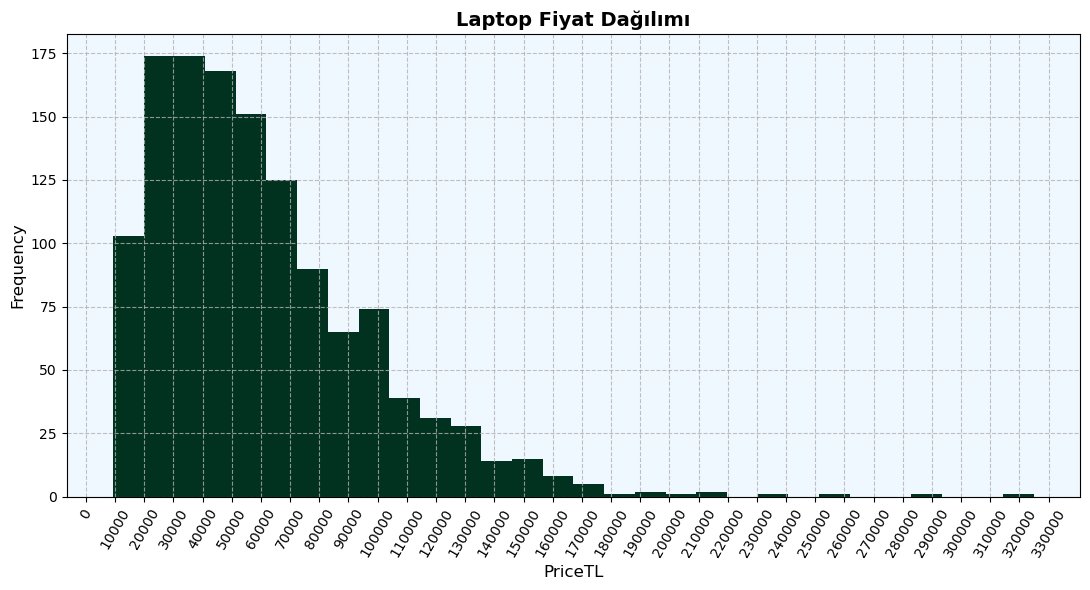

In [49]:
plt.figure(figsize=(11, 6))
plt.hist(df['PriceTL'], bins=30, color='#013220', edgecolor=None) 
plt.title('Laptop Fiyat Dağılımı', fontsize=14, fontweight='bold') 
plt.xlabel('PriceTL', fontsize=12)   
plt.ylabel('Frequency', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.xticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000), rotation=60)
plt.tight_layout()
plt.show()

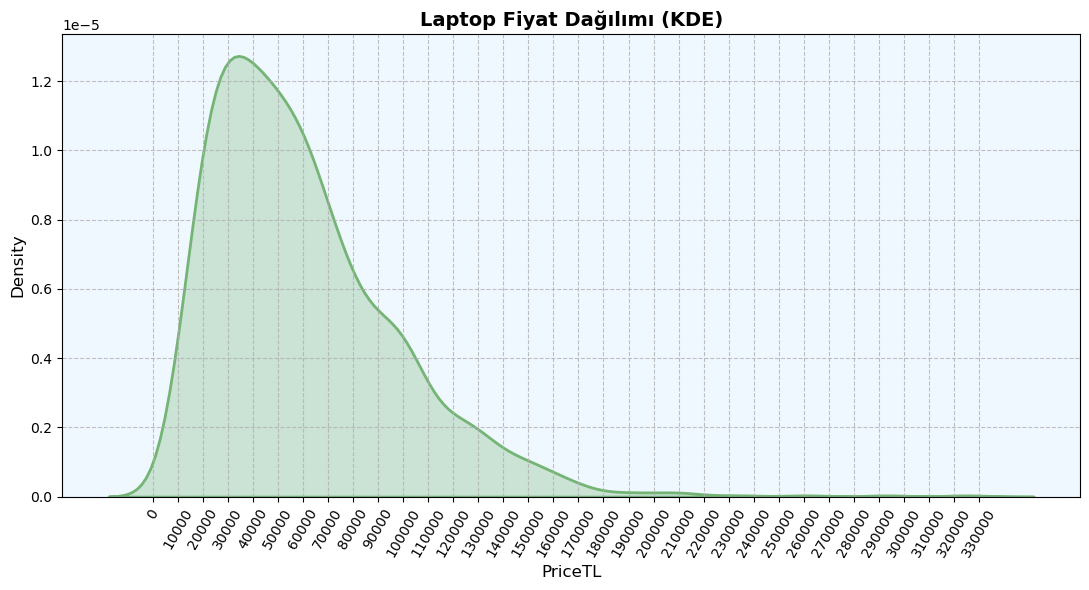

In [50]:
plt.figure(figsize=(11,6))
sns.kdeplot(df['PriceTL'], color="#74B474", linewidth=2, fill=True, alpha=0.3)
plt.title('Laptop Fiyat Dağılımı (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('PriceTL', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.xticks(ticks=range(0, int(df['PriceTL'].max()) + 10000, 10000), rotation=60)
plt.tight_layout()
plt.show()


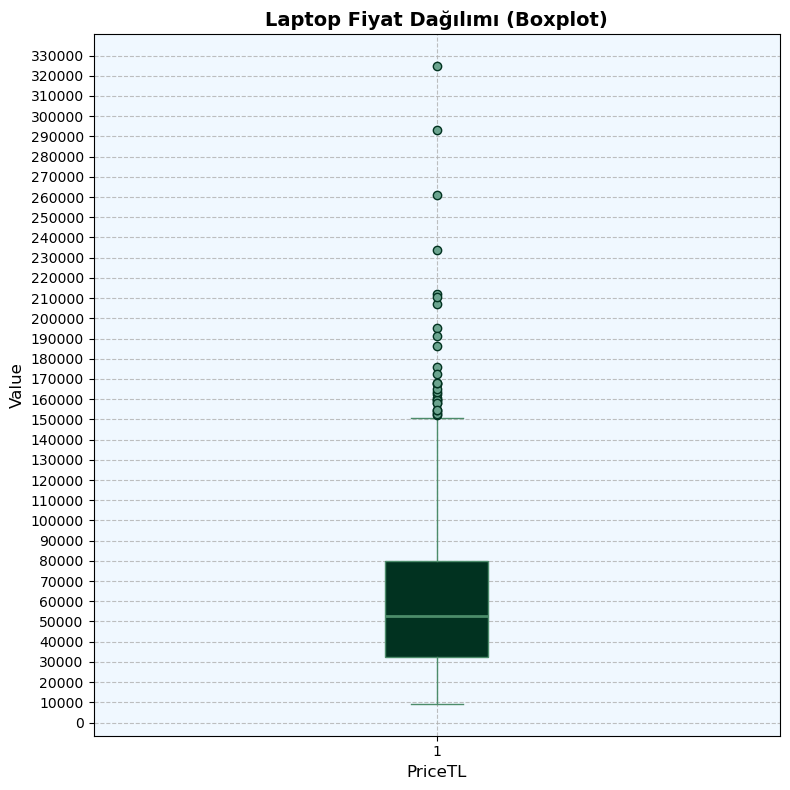

In [51]:
plt.figure(figsize=(8, 8))
plt.boxplot(df['PriceTL'], patch_artist=True,
            boxprops=dict(facecolor='#013220', color='#4C8C6A'),
            medianprops=dict(color='#4C8C6A', linewidth=2),
            whiskerprops=dict(color='#4C8C6A'),
            capprops=dict(color='#4C8C6A'),
            flierprops=dict(markerfacecolor='#6BA48F', marker='o', markersize=6, linestyle='none', markeredgecolor='#013220'))
plt.title('Laptop Fiyat Dağılımı (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('PriceTL', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

- At the upper end (whisker) there are a few models with much higher prices, indicating that there are expensive models on the market.The data set seems to contain outliers (very expensive laptops).

- Üst uçta (whisker) çok daha yüksek fiyatlı birkaç model var, bu da piyasada pahalı modellerin bulunduğunu gösteriyor. Veri setinde uç değerler (çok pahalı laptoplar) mevcut gözüküyor.


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Company-wise Analysis (Şirket Bazında Analiz)

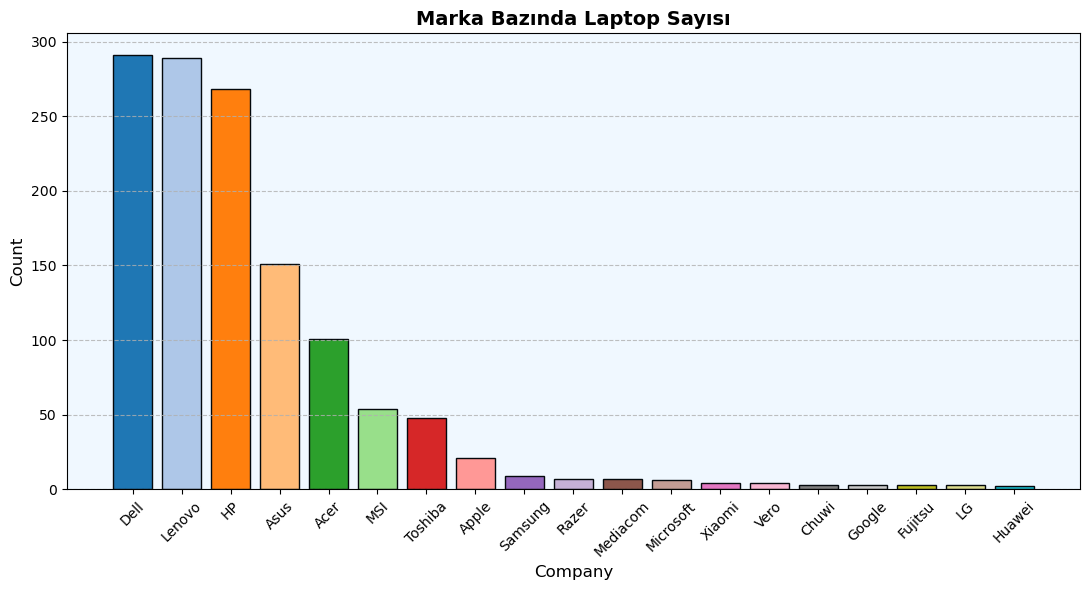

In [52]:
company_counts = df['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(11,6))
plt.bar(company_counts.index, company_counts.values, 
        color=colors[:20], edgecolor="#03080C") 
plt.title('Marka Bazında Laptop Sayısı', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

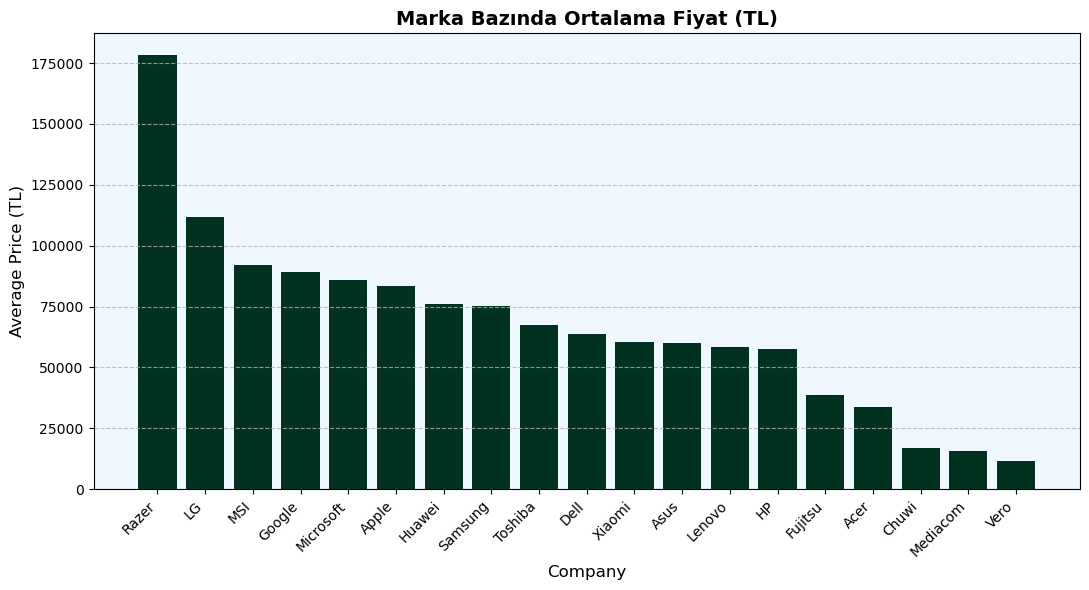

In [53]:
avg_price_by_company = df.groupby('Company')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(11,6))
plt.bar(avg_price_by_company.index, avg_price_by_company.values,color='#013220', edgecolor=None)
plt.title('Marka Bazında Ortalama Fiyat (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> INCH vs PRICE and RAM vs PRICE Analysis (İNÇ vs FİYAT ve RAM vs FİYAT Analizi)

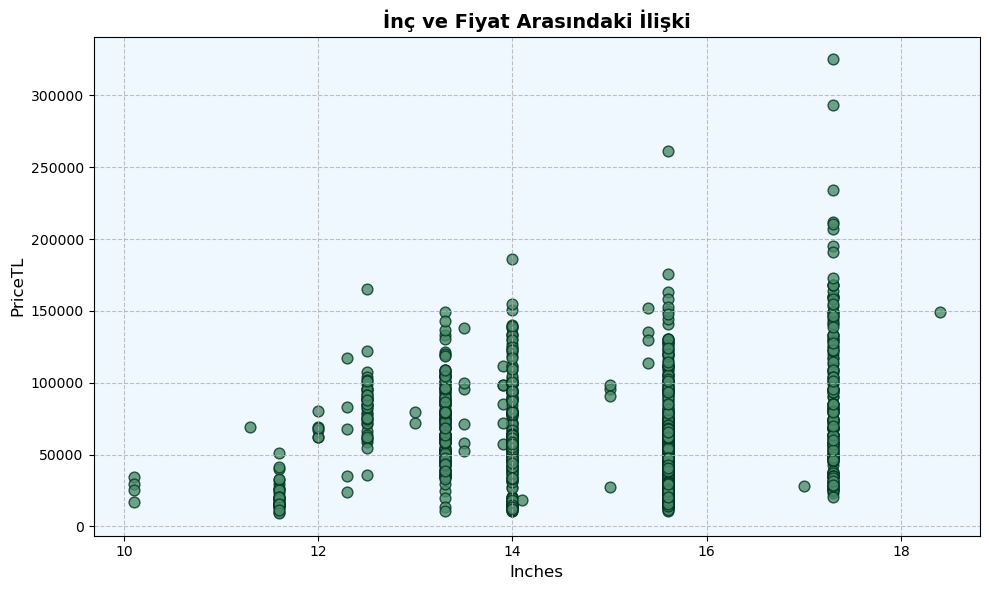

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Inches'], df['PriceTL'], color="#4C8C6A", edgecolors="#013220", alpha= 0.8, s=60)
plt.title('İnç ve Fiyat Arasındaki İlişki', fontsize=14, fontweight='bold') 
plt.xlabel('Inches', fontsize=12)  
plt.ylabel('PriceTL', fontsize=12)   
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.tight_layout()
plt.show()

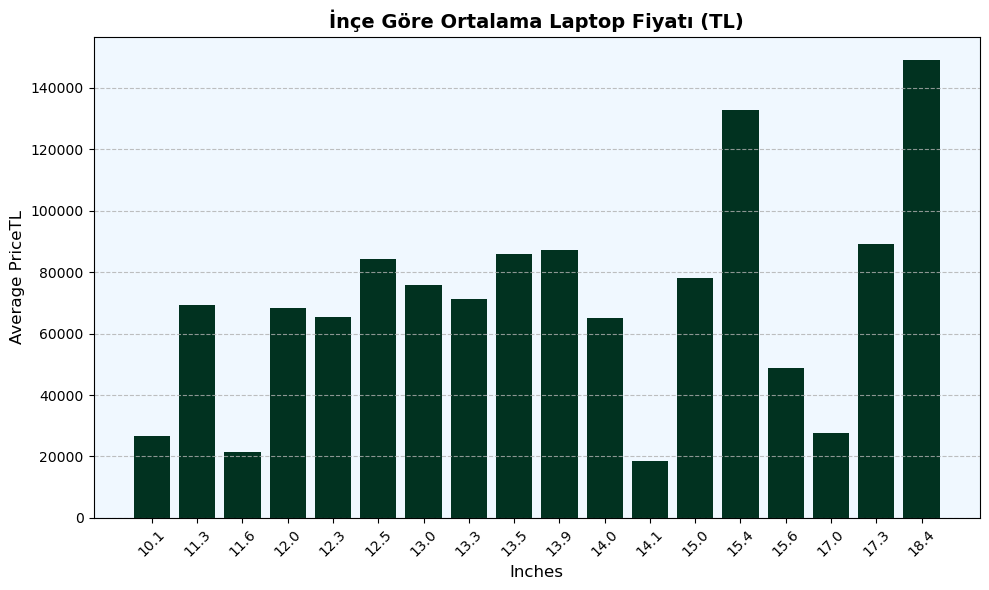

In [55]:
inch_avg_price = df.groupby('Inches')['PriceTL'].mean().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(inch_avg_price.index.astype(str), inch_avg_price.values, color='#013220', edgecolor=None)
plt.title('İnçe Göre Ortalama Laptop Fiyatı (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

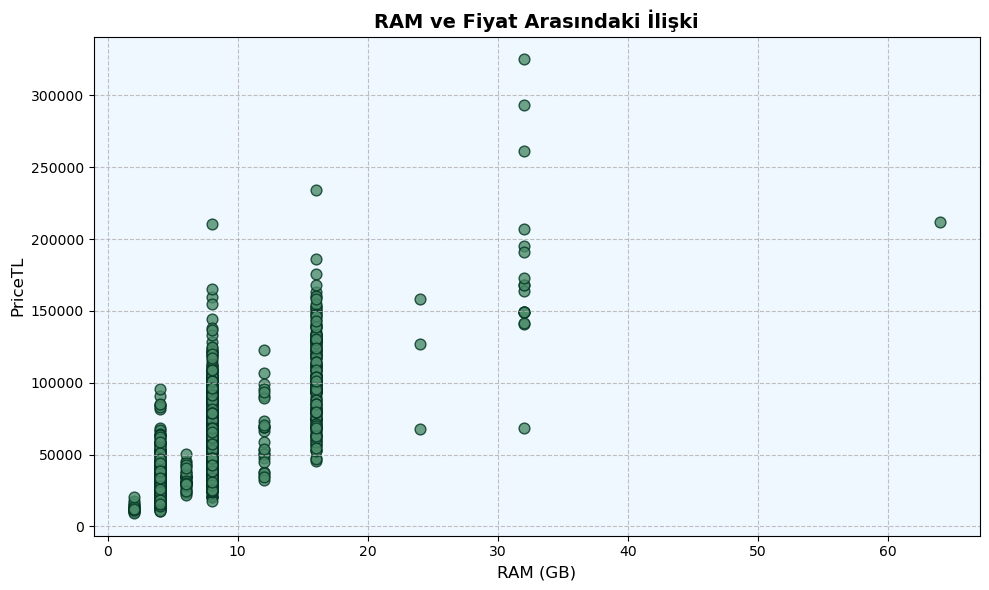

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RamGB'], df['PriceTL'], color="#4C8C6A", edgecolors="#013220", alpha= 0.8, s=60)
plt.title('RAM ve Fiyat Arasındaki İlişki', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()


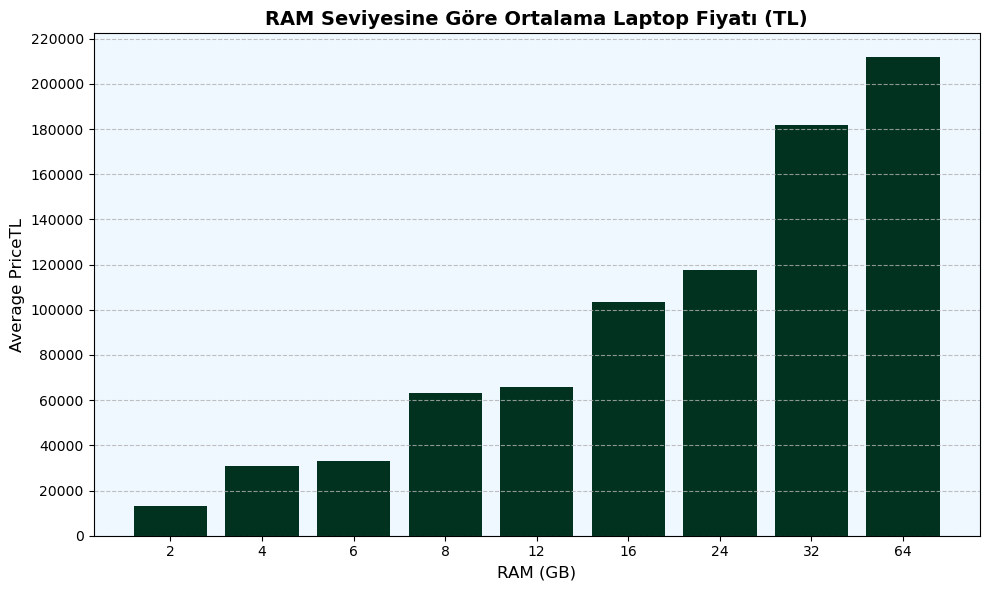

In [57]:
ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color='#013220', edgecolor=None)
plt.title('RAM Seviyesine Göre Ortalama Laptop Fiyatı (TL)', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Operating System Market Share (İşletim Sistemi Pazar Payı)

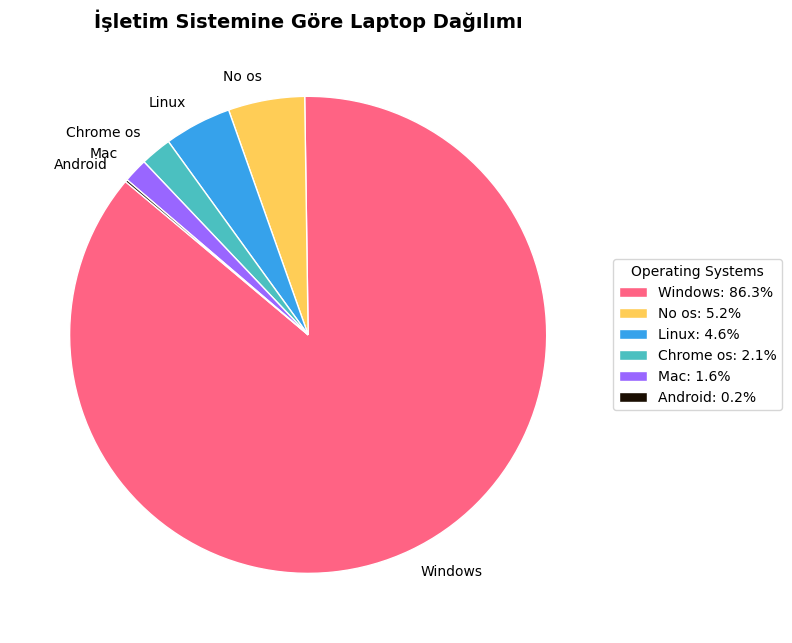

In [58]:
opsys_counts = df['Opsys'].value_counts()
colors = ['#FF6384', '#FFCD56', '#36A2EB', '#4BC0C0', '#9966FF', "#1A0E02"]
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    opsys_counts.values,
    labels=opsys_counts.index,  # sadece isimler
    startangle=140,
    colors=colors[:len(opsys_counts)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
labels_with_pct = [
    f"{name}: {pct:.1f}%" for name, pct in zip(
        opsys_counts.index,
        100 * opsys_counts.values / opsys_counts.values.sum())]
plt.legend(wedges, labels_with_pct, title="Operating Systems", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('İşletim Sistemine Göre Laptop Dağılımı', fontsize=14, fontweight='bold')
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Weight Distribution (Ağırlık Dağılımı)

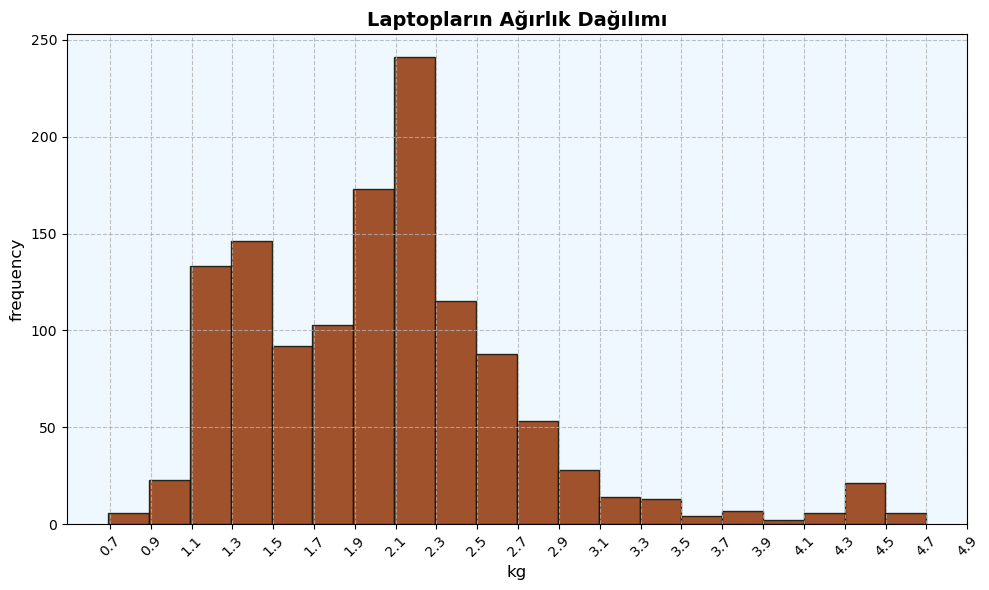

In [59]:
plt.figure(figsize=(10,6))
hist_colors = ["#0B1002DC",'#A0522D'] 
plt.hist(df['Kg'], bins=int((df['Kg'].max() - df['Kg'].min()) / 0.2), color=hist_colors[1], edgecolor=hist_colors[0])
plt.title('Laptopların Ağırlık Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('kg', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
ticks = [round(x, 1) for x in list(np.arange(df['Kg'].min(), df['Kg'].max()+0.2, 0.2))]
plt.xticks(ticks=ticks, rotation=45)  
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Price Correlation Analysis:

- We will calculate and visualize the correlation between numeric columns (Inches, Weight, Ram) and Price.
__________________________________________________________________________________________________________

- Sayısal sütunlar (İnç, Ağırlık, Ram) ve Fiyat arasındaki korelasyonu hesaplayıp görselleştireceğiz.

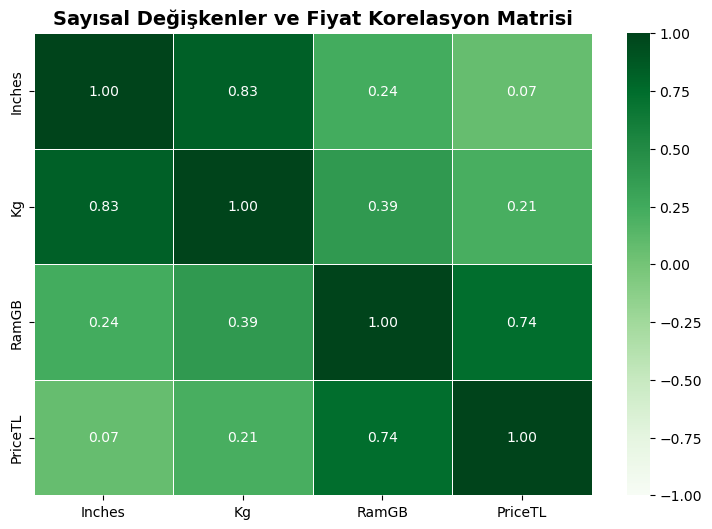

In [60]:
num_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f",
    linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Sayısal Değişkenler ve Fiyat Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.show()

In [61]:
# Very strong correlation between price and Ram (Fiyat ile Ram arasında çok güçlü korelasyon var)

<div class="alert alert-block alert-success">

#### <span style=" color:red"> ScreenResolution Impact on Price (Ekran Çözünürlüğünün Fiyat Üzerindeki Etkisi)

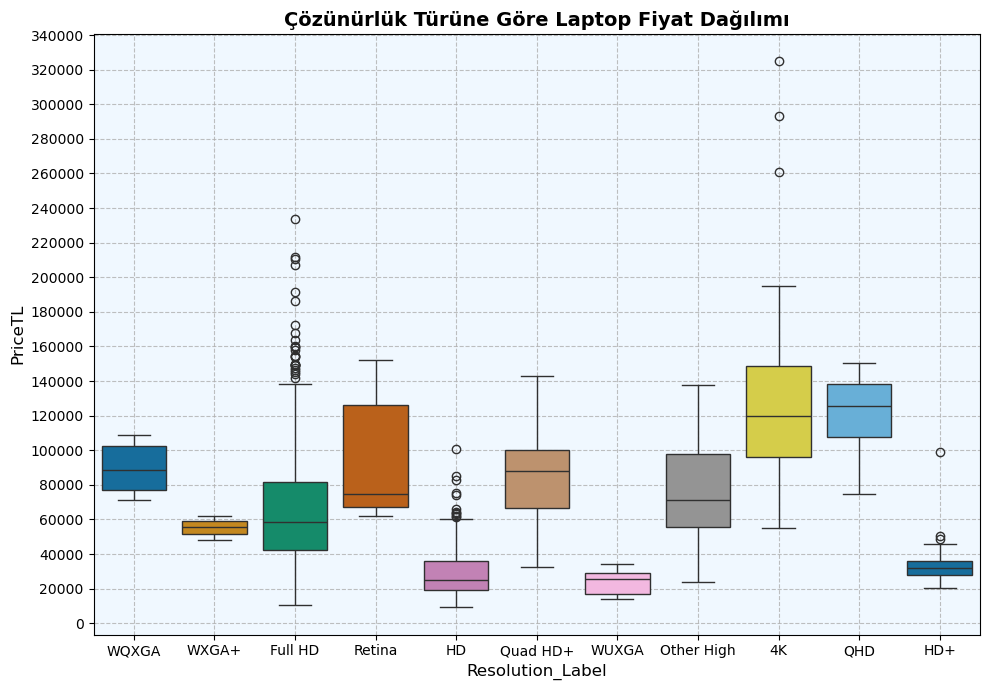

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Resolution_Label', y='PriceTL', data=df, palette='colorblind')
plt.title('Çözünürlük Türüne Göre Laptop Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Resolution_Label', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

In [63]:
# It is observed that 4K and QHD prices are higher than others, while Full HD has outlier values well above its average.
# (4K ve QHD fiyatlarının diğerlerine göre yüksek olduğu, Full HD de ise kendi ortalamasının çok üzerinde outlier(uç değerler) olduğu gözlemleniyor.)

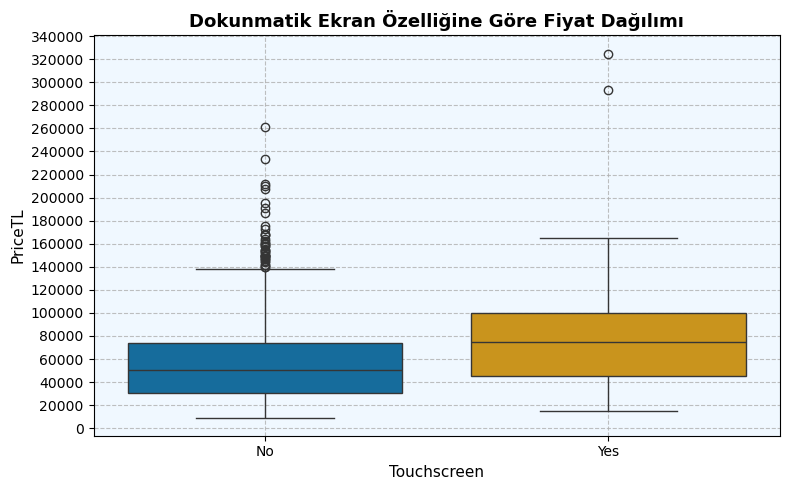

In [64]:
plt.figure(figsize=(8, 5))
palette = ['#0072B2', '#E69F00']
sns.boxplot(x='Touchscreen', y='PriceTL', data=df, palette=palette)
plt.title('Dokunmatik Ekran Özelliğine Göre Fiyat Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Touchscreen', fontsize=11)
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

In [65]:
# outlier high prices for laptops without touch screen.(dokunmatik ekran olamayan laptoplarda outlier(uç) yüksek fiyatlar söz konusu)

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Top CPU/GPU Manufacturers: (En yaygın CPU(işlemci) ve GPU(grafik kartı) üreticileri)

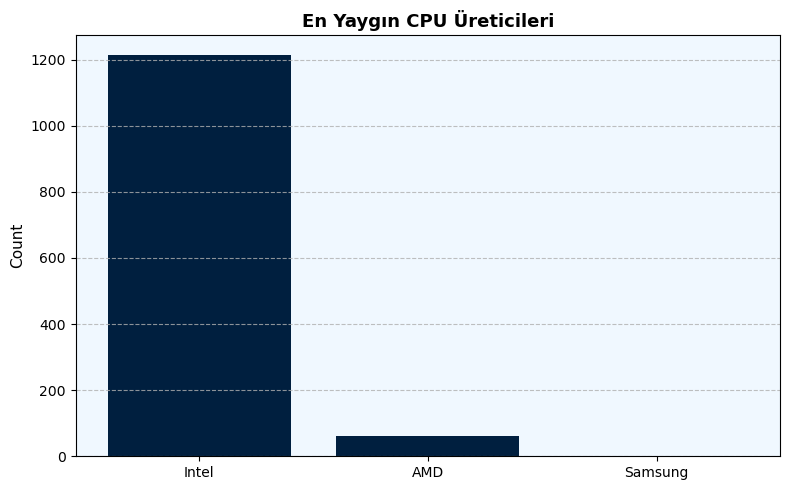

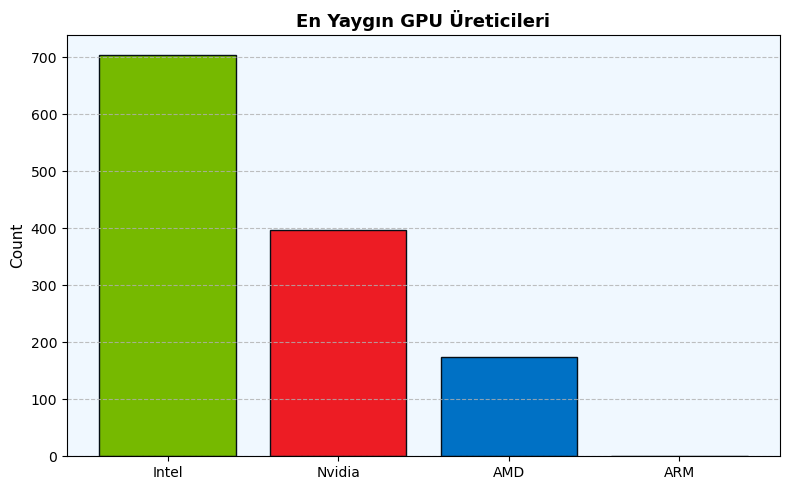

In [66]:
cpu_counts = df['Cpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(cpu_counts.index, cpu_counts.values, color='#001F3F', edgecolor=None)
plt.title('En Yaygın CPU Üreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

gpu_counts = df['Gpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
bar_color = ["#76B900", "#ED1C24", "#0071C5", "#010E12ED"] 
plt.bar(gpu_counts.index, gpu_counts.values, color= bar_color , edgecolor="#050E16")
plt.title('En Yaygın GPU Üreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

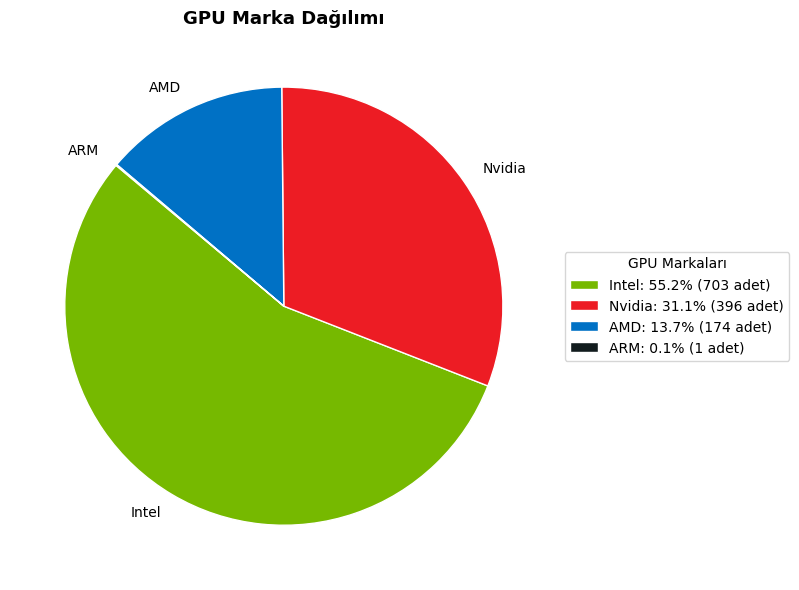

In [67]:
gpu_counts = df['Gpu_Brand'].value_counts()
colors = ["#76B900", "#ED1C24", "#0071C5", "#010B0EEE"]  # NVIDIA, AMD, Intel vs.
plt.figure(figsize=(9, 6))
wedges, texts = plt.pie(
    gpu_counts.values,
    labels=gpu_counts.index,  # GPU markaları grafik üzerinde yazacak
    startangle=140,
    colors=colors[:len(gpu_counts)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    autopct=None,  # Yüzde yazılmasın
    textprops={'fontsize': 10})
labels_with_info = [
    f"{brand}: {pct:.1f}% ({count} adet)"
    for brand, count, pct in zip(
        gpu_counts.index,
        gpu_counts.values,
        100 * gpu_counts.values / gpu_counts.values.sum())]
plt.legend(
    wedges,
    labels_with_info,
    title="GPU Markaları",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10)
plt.title('GPU Marka Dağılımı', fontsize=13, fontweight='bold')
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> RAM Analysis (RAM Analizi)

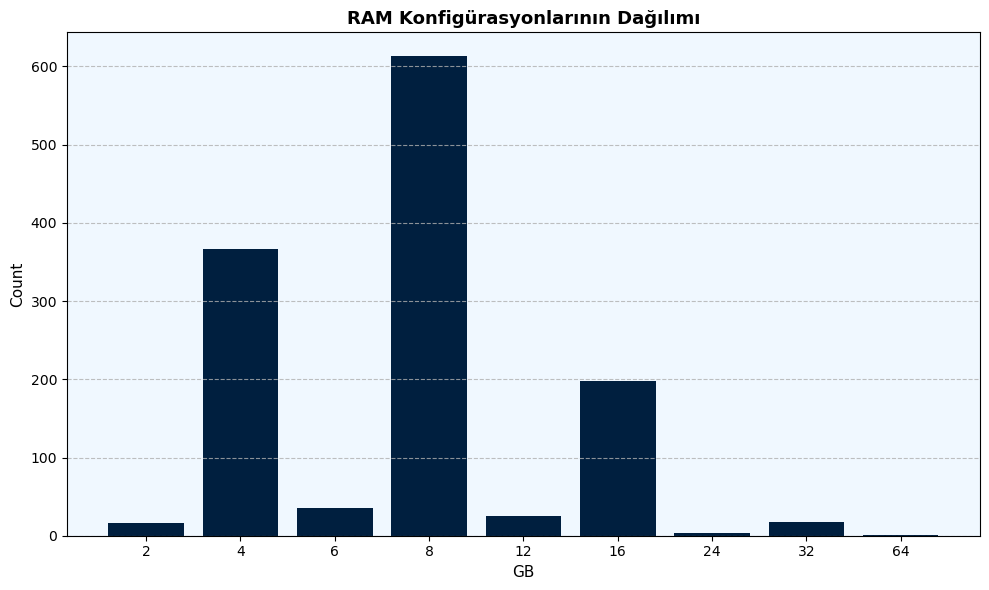

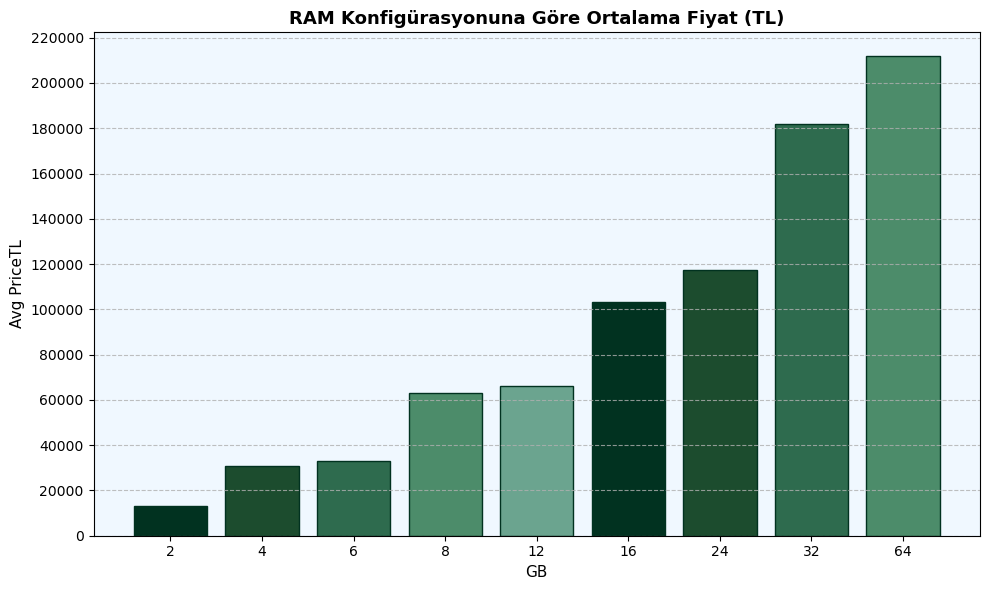

In [68]:
ram_counts = df['RamGB'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_counts.index.astype(str), ram_counts.values, color='#001F3F', edgecolor=None)
plt.title('RAM Konfigürasyonlarının Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()

green_palette = ['#013220', '#1C4C2E', '#2E6B4E', '#4C8C6A', '#6BA48F']

bar_colors = (green_palette * ((len(ram_avg_price) // len(green_palette)) + 1))[:len(ram_avg_price)]

plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color=bar_colors, edgecolor='#013220')
plt.title('RAM Konfigürasyonuna Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Avg PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> Memory Type and Price Relationship (Bellek Türü ve Fiyat İlişkisi)

In [69]:
# Bellek türünü ayıklayan fonksiyon
def extract_memory_type(text):
    text = text.lower()
    if 'ssd' in text and 'hdd' in text:
        return 'Hybrid'
    elif 'flash storage' in text:
        return 'Flash Storage'
    elif 'hybrid' in text:
        return 'Hybrid'
    elif 'ssd' in text:
        return 'SSD'
    elif 'hdd' in text:
        return 'HDD'
    else:
        return 'Other'
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)

In [70]:
df['Memory_Type'].value_counts()

Memory_Type
SSD              635
HDD              358
Hybrid           210
Flash Storage     71
Name: count, dtype: int64

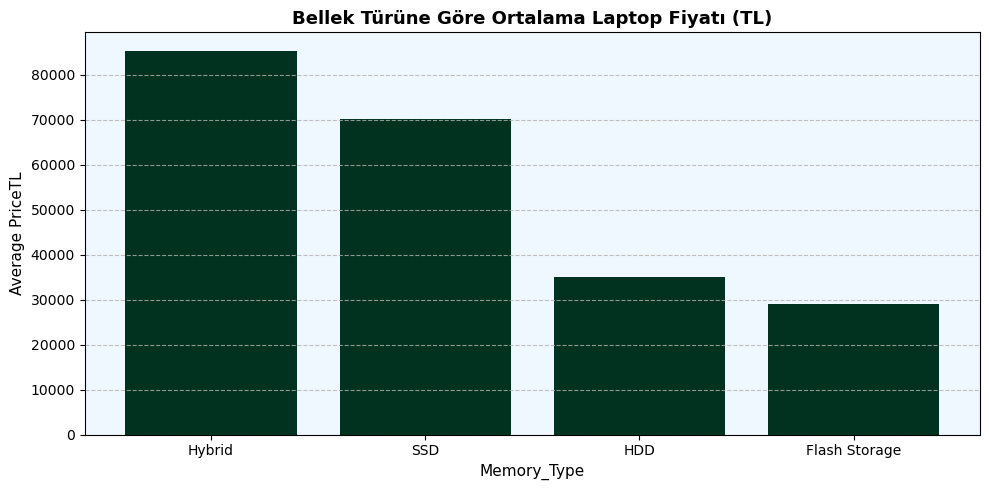

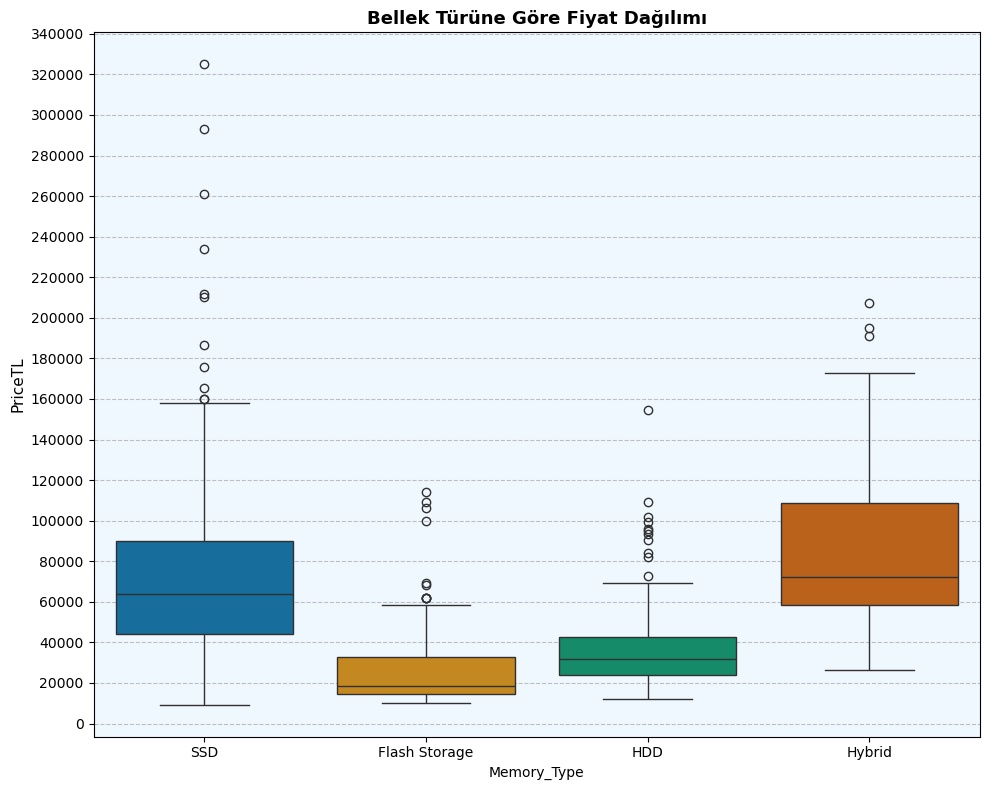

In [71]:
mem_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(mem_price.index, mem_price.values, color='#013220', edgecolor=None)
plt.title('Bellek Türüne Göre Ortalama Laptop Fiyatı (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Memory_Type', y='PriceTL', data=df, palette='colorblind')
plt.title('Bellek Türüne Göre Fiyat Dağılımı', fontsize=13, fontweight='bold')
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red"> High-end Laptop Analysis (Üst Düzey Laptop Analizi)

Üst Düzey Laptopların Temel İstatistikleri:
         count           mean           std       min        25%         50%  \
Inches   256.0      15.126563      1.629507     12.30     13.975      15.600   
RamGB    256.0      13.984375      6.905507      4.00      8.000      16.000   
Kg       256.0       2.226922      1.082476      0.91      1.320       1.950   
PriceTL  256.0  119161.494336  31914.175242  88924.32  98461.440  109168.055   

               75%        max  
Inches       17.30      18.40  
RamGB        16.00      64.00  
Kg            2.90       4.70  
PriceTL  130482.72  324954.72  


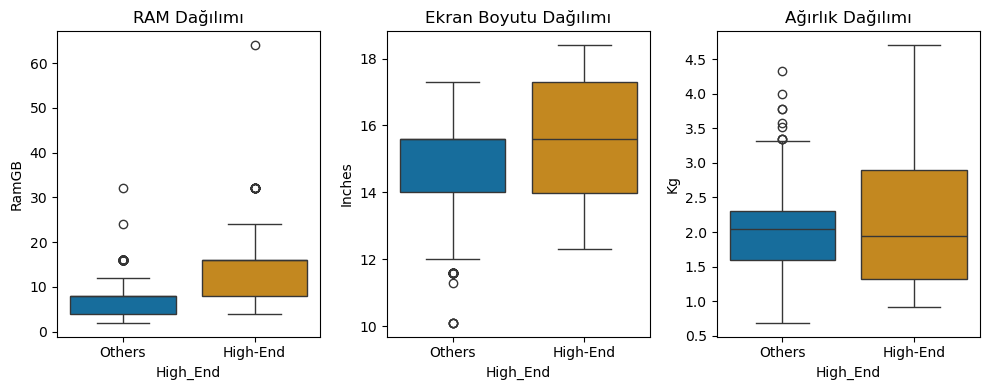

Üst Düzey Laptoplarda En Yaygın Şirketler:
Company
Dell         59
Lenovo       59
HP           45
Asus         30
MSI          26
Toshiba      10
Apple         7
Razer         6
Samsung       4
Microsoft     3
LG            3
Acer          3
Google        1
Name: count, dtype: int64

Üst Düzey Laptoplarda Bellek Türleri:
Memory_Type
SSD              167
Hybrid            77
HDD                8
Flash Storage      4
Name: count, dtype: int64


In [72]:
# High-end laptops price threshold (top 20% price range)
# Üst düzey laptoplar için fiyat eşiği (en üst %20 fiyat dilimi)
price_threshold = df['PriceTL'].quantile(0.80) 

df['High_End'] = np.where(df['PriceTL'] >= price_threshold, 'High-End', 'Others')

high_end_stats = df[df['High_End'] == 'High-End'].describe().T
print("Üst Düzey Laptopların Temel İstatistikleri:")
print(high_end_stats)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='High_End', y='RamGB', data=df, palette='colorblind')
plt.title('RAM Dağılımı')

plt.subplot(1, 3, 2)
sns.boxplot(x='High_End', y='Inches', data=df, palette='colorblind')
plt.title('Ekran Boyutu Dağılımı')

plt.subplot(1, 3, 3)
sns.boxplot(x='High_End', y='Kg', data=df, palette='colorblind')
plt.title('Ağırlık Dağılımı')

plt.tight_layout()
plt.show()

# Üst düzey laptoplarda en yaygın şirketler ve bellek türleri
print("Üst Düzey Laptoplarda En Yaygın Şirketler:")
print(df[df['High_End'] == 'High-End']['Company'].value_counts())

print("\nÜst Düzey Laptoplarda Bellek Türleri:")
print(df[df['High_End'] == 'High-End']['Memory_Type'].value_counts())

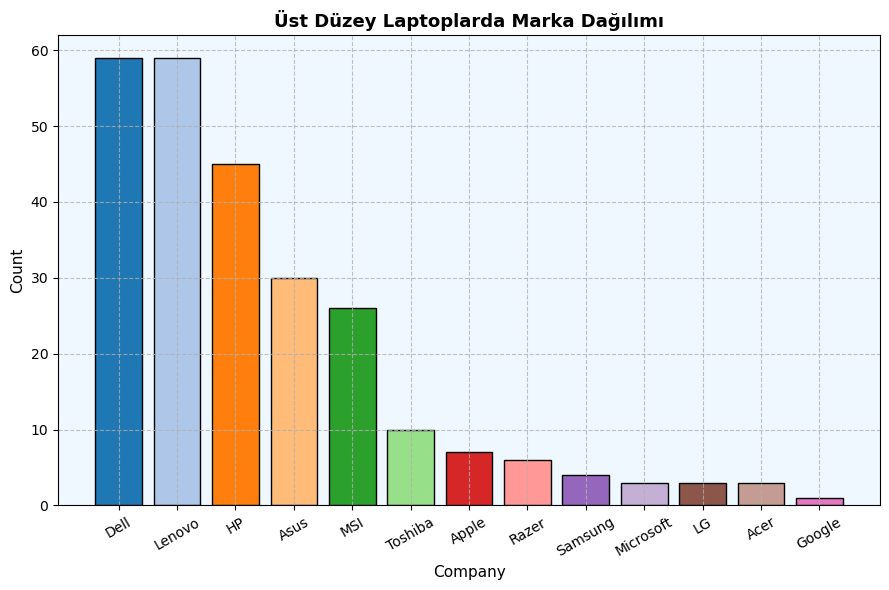

In [73]:
high_end_comp_counts = df[df['High_End'] == 'High-End']['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(9, 6))
plt.bar(high_end_comp_counts.index, high_end_comp_counts.values, 
        color=colors[:len(high_end_comp_counts)], edgecolor='black') 
plt.title('Üst Düzey Laptoplarda Marka Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Company', fontsize=11)  
plt.ylabel('Count', fontsize=11)   
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

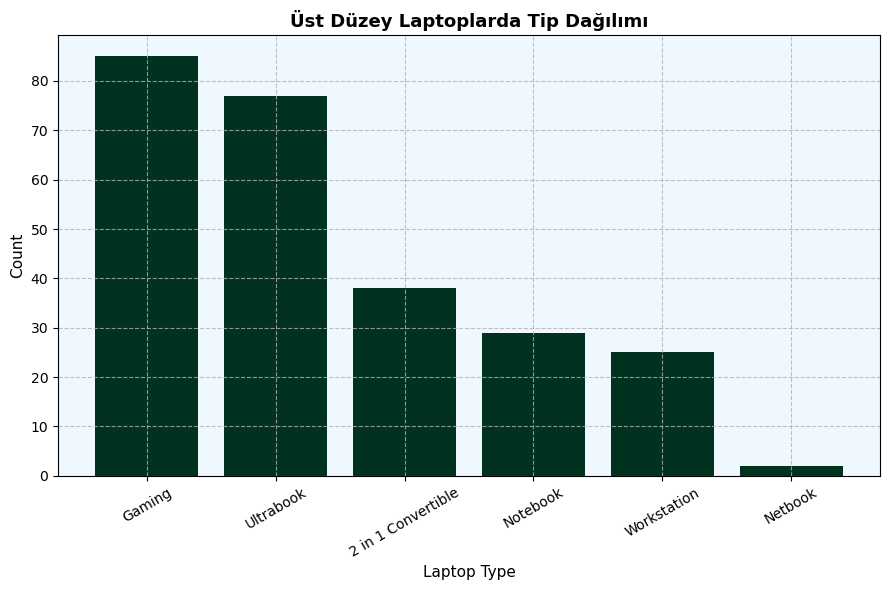

In [74]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor=None)
plt.title('Üst Düzey Laptoplarda Tip Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Laptop Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

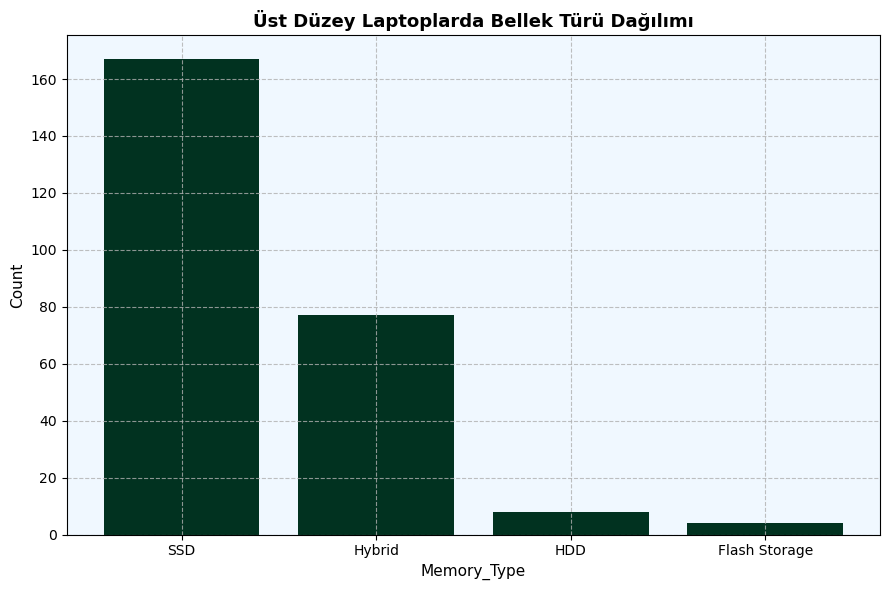

In [75]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Memory_Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor=None)
plt.title('Üst Düzey Laptoplarda Bellek Türü Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

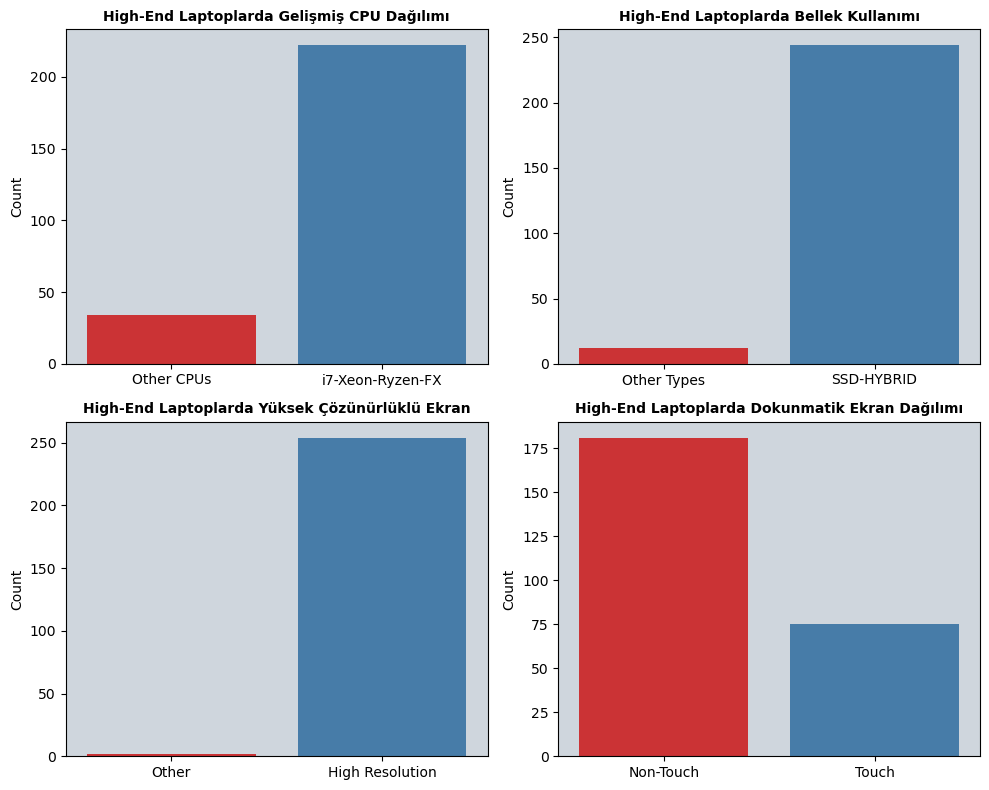

In [76]:
high_end = df[df['High_End'] == 'High-End']

advanced_cpus = ['Core i7', 'Xeon', 'Ryzen 1700', 'Ryzen 1600', 'FX']

high_end['Advanced_CPU'] = high_end['Cpu_Type'].isin(advanced_cpus)
high_end['SSD_Hybrid'] = high_end['Memory_Type'].fillna('').str.upper().str.contains('SSD|HYBRID')
high_end['High_Res'] = high_end['Resolution_Label'].isin([
    "Full HD", "4K", "Quad HD+", "QHD", "Retina", "WQXGA", "WUXGA", "Other High"])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

cpu_counts = high_end['Advanced_CPU'].value_counts().sort_index()
cpu_labels = ['Other CPUs', 'i7-Xeon-Ryzen-FX']
sns.barplot(x=cpu_labels, y=cpu_counts.values, palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title('High-End Laptoplarda Gelişmiş CPU Dağılımı', fontsize=10, fontweight='bold')
axes[0, 0].set_facecolor('#CFD6DD')
axes[0, 0].set_ylabel('Count')

storage_counts = high_end['SSD_Hybrid'].value_counts().sort_index()
storage_labels = ['Other Types', 'SSD-HYBRID']
sns.barplot(x=storage_labels, y=storage_counts.values, palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title('High-End Laptoplarda Bellek Kullanımı', fontsize=10, fontweight='bold')
axes[0, 1].set_facecolor('#CFD6DD')
axes[0, 1].set_ylabel('Count')

res_counts = high_end['High_Res'].value_counts().sort_index()
res_labels = ['Other', 'High Resolution']
sns.barplot(x=res_labels, y=res_counts.values, palette="Set1", ax=axes[1, 0])
axes[1, 0].set_title('High-End Laptoplarda Yüksek Çözünürlüklü Ekran', fontsize=10, fontweight='bold')
axes[1, 0].set_facecolor('#CFD6DD')
axes[1, 0].set_ylabel('Count')

touch_counts = high_end['Touchscreen'].value_counts().reindex(['No', 'Yes']).fillna(0)
touch_labels = ['Non-Touch', 'Touch']
sns.barplot(x=touch_labels, y=touch_counts.values, palette="Set1", ax=axes[1, 1])
axes[1, 1].set_title('High-End Laptoplarda Dokunmatik Ekran Dağılımı', fontsize=10, fontweight='bold')
axes[1, 1].set_facecolor('#CFD6DD')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

#### <span style=" color:red"> Type Analysis (Laptop tipi analizi)

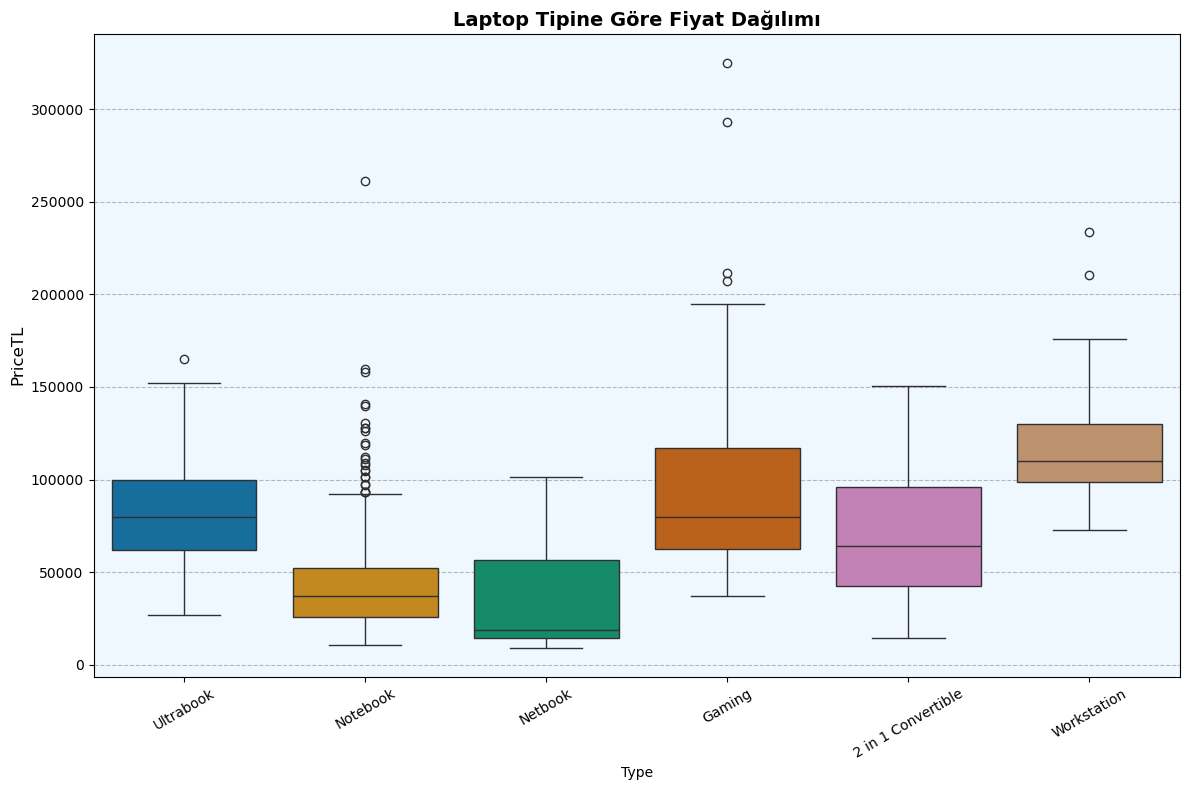

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='PriceTL', data=df, palette='colorblind')
plt.title('Laptop Tipine Göre Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.ylabel('PriceTL', fontsize=12)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

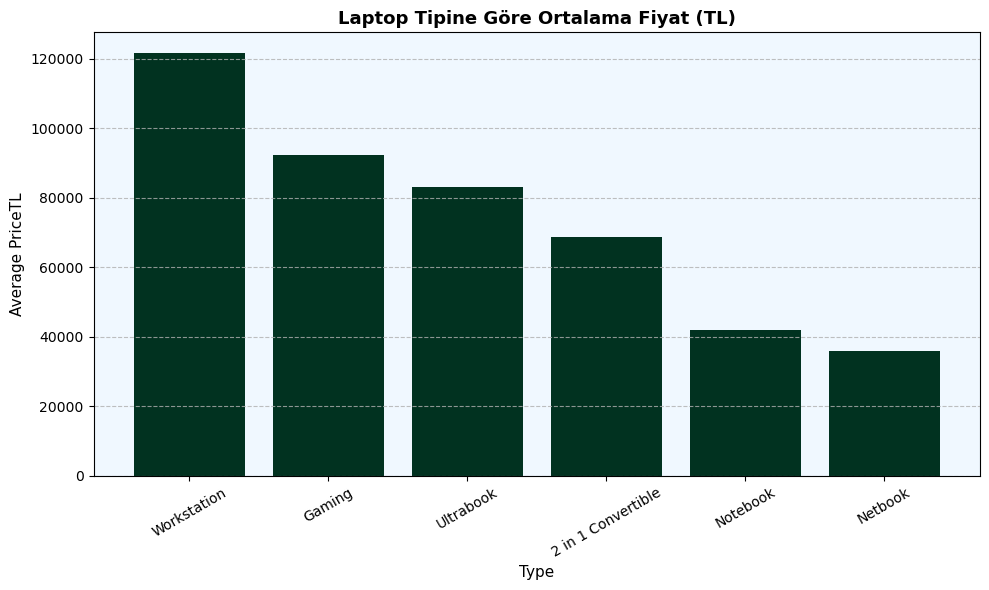

In [78]:
laptop_avg_price = df.groupby('Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(laptop_avg_price.index, laptop_avg_price.values, color='#013220', edgecolor=None)
plt.title('Laptop Tipine Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

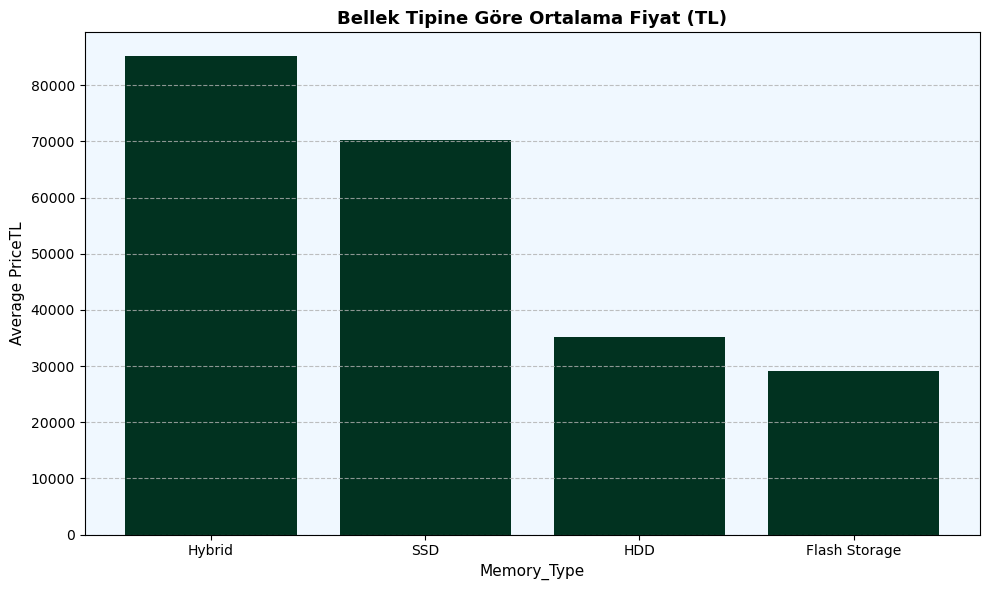

In [79]:
memory_avg_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(memory_avg_price.index, memory_avg_price.values, color='#013220', edgecolor=None)
plt.title('Bellek Tipine Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

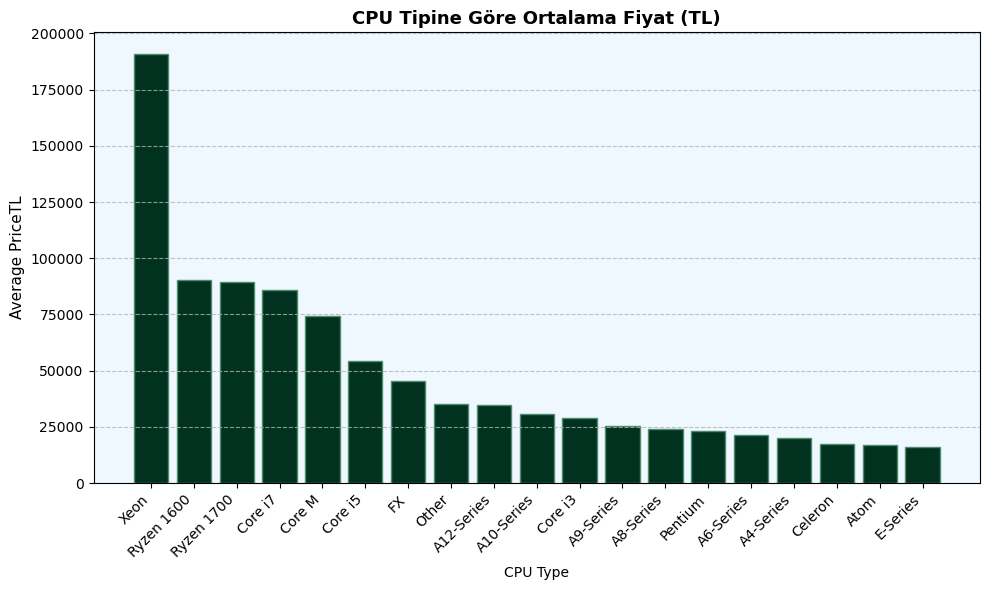

In [80]:
cpu_avg_price = df.groupby('Cpu_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(cpu_avg_price.index, cpu_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('CPU Tipine Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('CPU Type', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

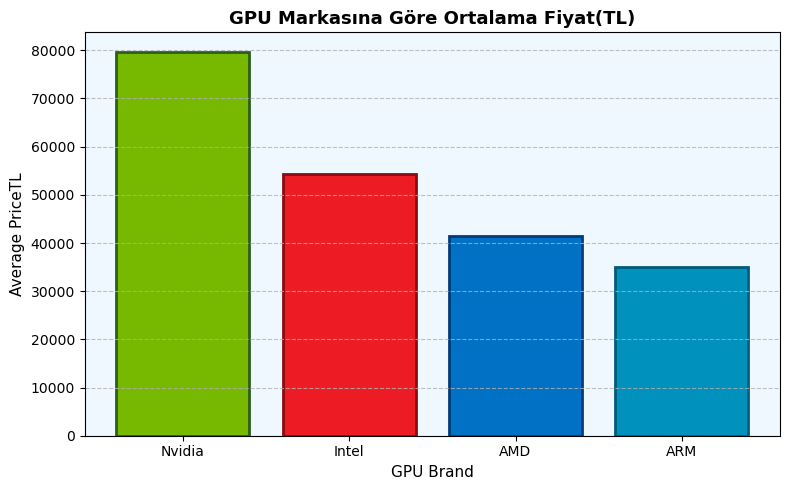

In [81]:
gpu_avg_price = df.groupby('Gpu_Brand')['PriceTL'].mean().sort_values(ascending=False)
bar_colors = ["#76B900", "#ED1C24", "#0071C5", "#0091BD"] 
edge_colors = ["#2D5C1F", "#8A0C12", "#003C75", "#005D7A"]
plt.figure(figsize=(8,5))
plt.bar(gpu_avg_price.index, gpu_avg_price.values, color=bar_colors, edgecolor=edge_colors, linewidth=2)
plt.title('GPU Markasına Göre Ortalama Fiyat(TL)', fontsize=13, fontweight='bold')
plt.xlabel('GPU Brand', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

#### <span style=" color:red">Conclusions

<div class="alert alert-block alert-success">


Hardware Specifications:

RAM capacity and storage type (especially SSD and hybrid solutions) are among the most influential factors in determining laptop prices.
SSD and hybrid memory types are also significant factors that increase the price.

Screen Specifications:

It has been determined that laptops with high-resolution screens and touchscreen capabilities are priced above the average.
This finding shows that screen technology is an important factor that increases the price.

Processor and Graphics Card Impact:

Performance-focused Intel processors drive up the price.
In laptops designed for gaming and professional use, especially Intel i7 series processors and Nvidia GPUs significantly increase the price.

Computer Type Impact:

Workstation, Gaming, and Ultrabook devices are seen to be in the high price segment.

Weight and Portability:

Portability features are also among the factors affecting price. Ultrabook and 2-in-1 Convertible models, in particular, are priced above average due to their lightweight construction and high portability features. 
In contrast, Gaming and Workstation devices, which have larger and heavier cases, are also in the high price range because they offer high performance.

High-End Laptop Segment:

In the top 20% of the price distribution, Dell, Lenovo, and HP brands are concentrated.
Most devices in this segment have high RAM capacity, SSD and hybrid storage, advanced processors, high-resolution screens, and powerful graphics cards.
However, the vast majority of devices in the highest price segment in this data set do not have touchscreen capability. 
This reveals that the most influential factors on price are the processor, RAM, GPU, and memory type.

The study found that the most critical factors determining laptop prices are:
Hardware specifications, particularly high RAM capacity, SSD storage solutions, advanced processors (CPU), and powerful graphics cards (GPU).

Note: This analysis was conducted solely within the scope of the current data set. Additional analyses using broader and more up-to-date data will provide a clearer picture of market trends and determining factors.

___________________________________________
Donanım Özellikleri:

RAM kapasitesi ve depolama türü (özellikle SSD ve hibrit çözümler) dizüstü bilgisayar fiyatlarını belirlemede en etkili faktörler arasında yer almaktadır.
SSD ve hibrit bellek türü de fiyatı yükeselten önemli bir etkendir.

Ekran Özellikleri:

Yüksek çözünürlüklü ekranlar ve dokunmatik ekran özelliğine sahip dizüstü bilgisayarların fiyat ortalamasının üzerinde konumlandığı tespit edilmiştir.
Bu bulgu, ekran teknolojisinin fiyatı artıran önemli bir unsur olduğunu göstermektedir.

İşlemci ve Grafik Kartı Etkisi:

Performans odaklı Intel işlemciler fiyatı yukarı çekmektedir.
Oyun ve profesyonel kullanım odaklı dizüstü bilgisayarlarda, özellikle Intel i7 serisi işlemciler ve Nvidia GPU lar fiyatı anlamlı şekilde artırmaktadır.

Bilgisayar Tipi Etkisi:

Workstation, Gaming ve Ultrabook türündeki cihazların yüksek fiyat segmentinde yer aldığı görülmüştür.

Ağırlık ve Taşınabilirlik:

Taşınabilirlik özellikleri de fiyatı etkileyen faktörler arasındadır. Özellikle Ultrabook ve 2-in-1 Convertible modeller, hafif yapıları ve yüksek taşınabilirlik özellikleri nedeniyle ortalamanın üzerinde fiyatlandırılmaktadır. 
Buna karşılık, daha büyük ve ağır kasalara sahip olan Gaming ve Workstation cihazlar d yüksek performansa sahip oldukları için yine yüksek fiyat aralığında yer almaktadır.

Üst Düzey Dizüstü Bilgisayar Segmenti:

Fiyat dağılımının en üst %20 lik diliminde, Dell, Lenovo ve HP markalarının yoğunlaştığı görülmüştür.
Bu segmentteki cihazların çoğu yüksek RAM kapasitesine, SSD ve Hibrit depolama birimine, gelişmiş işlemcilere ve yüksek çözünürlüklü ekranlara ve güçlü grafik kartlarına sahiptir.
Ancak bu veri setindeki en yüksek fiyat segmentindeki cihazların büyük çoğunluğunda dokunmatik ekran özelliği bulunmamaktadır. 
Bu da fiyat üzerinde en etkili olanın işlemci, RAM, GPU ve bellek türü olduğunu ortaya koymaktadır.

Çalışma sonucunda, dizüstü bilgisayar fiyatlarını belirleyen en kritik faktörlerin;
Donanım özellikleri; özellikle yüksek RAM kapasiteleri, SSD depolama çözümleri, gelişmiş işlemciler(CPU) ve güçlü grafik kartları(GPU) olduğu görülmektedir.

Not: Bu analiz yalnızca mevcut veri seti kapsamında gerçekleştirilmiştir. Daha geniş kapsamlı ve güncel verilerle yapılacak ek analizler, pazardaki eğilimlerin ve belirleyici faktörlerin daha net ortaya konmasını sağlayacaktır.